<a href="https://colab.research.google.com/github/Guddi1999/Fraud_Detection_Analysis.ipynb/blob/main/Fraud_Detection_EDA_Analysis_and_Model_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fraud Detection Analysis**

Fraud detection is the process of identifying and preventing fraudulent activities, typically in financial transactions, insurance claims, e-commerce, and cybersecurity. It involves analyzing data to detect suspicious patterns, anomalies, or behaviors that indicate fraudulent activities.

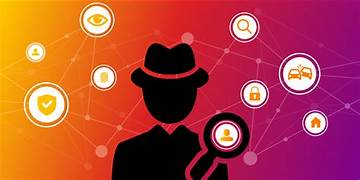

**Importing Necessary Libraries to Perform the Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Overview of the Dataset-**

In [ ]:
df = pd.read_csv('/content/Fraud Detection Dataset.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


**Size of the dataset along with the Column Names**

In [ ]:
print(df.shape)
print(df.columns)

(51000, 12)
Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent'],
      dtype='object')


**Renaming the Columns for Better Understanding of the Dataset**

In [ ]:
df.rename(columns={'oldbalanceOrg':'old_balance_org', 'newbalanceOrig':'new_balance_org', 'oldbalanceDest':'old_balance_dest', 'newbalanceDest':'new_balance_dest'}, inplace=True)
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


**Examining the Duplicates and Removing them**

In [ ]:
df.duplicated().sum()

881

In [ ]:
df.drop_duplicates(inplace=True)

**Displaying the information each columns hold in the dataset**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50119 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    50119 non-null  object 
 1   User_ID                           50119 non-null  int64  
 2   Transaction_Amount                47643 non-null  float64
 3   Transaction_Type                  50119 non-null  object 
 4   Time_of_Transaction               47614 non-null  float64
 5   Device_Used                       47682 non-null  object 
 6   Location                          47619 non-null  object 
 7   Previous_Fraudulent_Transactions  50119 non-null  int64  
 8   Account_Age                       50119 non-null  int64  
 9   Number_of_Transactions_Last_24H   50119 non-null  int64  
 10  Payment_Method                    47691 non-null  object 
 11  Fraudulent                        50119 non-null  int64  
dtypes: float6

**Checking the Null Values and Discrepancies in the Dataset**

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,2476
Transaction_Type,0
Time_of_Transaction,2505
Device_Used,2437
Location,2500
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


In [ ]:
df['Transaction_Amount'] = df['Transaction_Amount'].fillna(df['Transaction_Amount'].mean())
df['Time_of_Transaction'] = df['Time_of_Transaction'].fillna(df['Time_of_Transaction'].mean())
df['Payment_Method'] = df['Payment_Method'].fillna(df['Payment_Method'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['Device_Used'] = df['Device_Used'].fillna(df['Device_Used'].mode()[0])

df.head(4)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.000000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.000000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.488575,Mobile,Boston,3,115,9,UPI,0
3,T4,2294,100.10,Bill Payment,15.000000,Desktop,Chicago,4,3,4,UPI,0


In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,0
Transaction_Type,0
Time_of_Transaction,0
Device_Used,0
Location,0
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


**Lets study the main Features of the Data Distribution**

In [ ]:
df.describe(include='all')

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
count,50119,50119.000000,50119.000000,50119,50119.000000,50119,50119,50119.000000,50119.000000,50119.000000,50119,50119.000000
unique,50000,NaN,NaN,5,NaN,4,8,NaN,NaN,NaN,5,NaN
top,T28617,NaN,NaN,Bill Payment,NaN,Desktop,Boston,NaN,NaN,NaN,UPI,NaN
freq,2,NaN,NaN,10161,NaN,17961,8537,NaN,NaN,NaN,14099,NaN
mean,NaN,3004.733195,2999.104599,NaN,11.488575,NaN,NaN,1.996448,60.029071,7.495640,NaN,0.049223
std,NaN,1152.620471,4934.602301,NaN,6.746058,NaN,NaN,1.415492,34.392569,4.019806,NaN,0.216335
min,NaN,1000.000000,5.030000,NaN,0.000000,NaN,NaN,0.000000,1.000000,1.000000,NaN,0.000000
25%,NaN,2007.000000,1333.370000,NaN,6.000000,NaN,NaN,1.000000,30.000000,4.000000,NaN,0.000000
50%,NaN,2997.000000,2655.340000,NaN,11.488575,NaN,NaN,2.000000,60.000000,7.000000,NaN,0.000000
75%,NaN,4005.000000,3721.755000,NaN,17.000000,NaN,NaN,3.000000,90.000000,11.000000,NaN,0.000000


In [ ]:
df.head(4)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.000000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.000000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.488575,Mobile,Boston,3,115,9,UPI,0
3,T4,2294,100.10,Bill Payment,15.000000,Desktop,Chicago,4,3,4,UPI,0


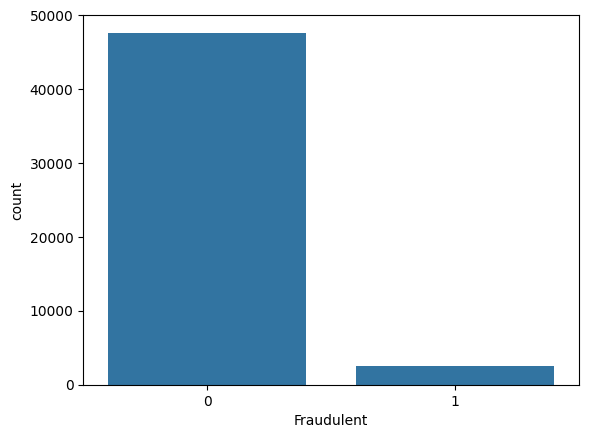

In [ ]:
import plotly.express as px
sns.countplot(x='Fraudulent', data=df)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50119 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    50119 non-null  object 
 1   User_ID                           50119 non-null  int64  
 2   Transaction_Amount                50119 non-null  float64
 3   Transaction_Type                  50119 non-null  object 
 4   Time_of_Transaction               50119 non-null  float64
 5   Device_Used                       50119 non-null  object 
 6   Location                          50119 non-null  object 
 7   Previous_Fraudulent_Transactions  50119 non-null  int64  
 8   Account_Age                       50119 non-null  int64  
 9   Number_of_Transactions_Last_24H   50119 non-null  int64  
 10  Payment_Method                    50119 non-null  object 
 11  Fraudulent                        50119 non-null  int64  
dtypes: float6

**The Total Number of Transaction Takes Place based on Location**

In [ ]:
Tansactions_in_last24hrs =df.groupby('Location')['Number_of_Transactions_Last_24H'].sum()
Tansactions_in_last24hrs

,Number_of_Transactions_Last_24H
Location,
Boston,63653
Chicago,44176
Houston,45276
Los Angeles,43872
Miami,44559
New York,44774
San Francisco,44203
Seattle,45161


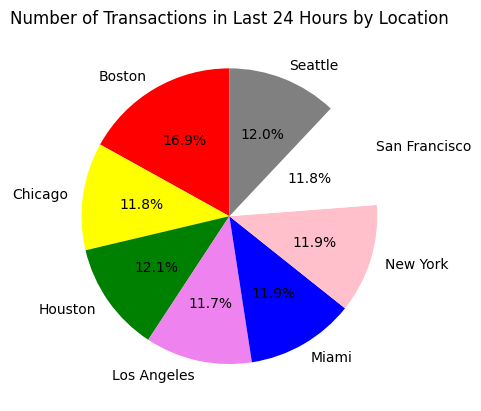

In [ ]:
colors = ['red', 'yellow', 'green','violet', 'blue', 'pink', 'white', 'grey']
plt.pie(Tansactions_in_last24hrs, labels=Tansactions_in_last24hrs.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Number of Transactions in Last 24 Hours by Location')
plt.show()

Comparing to all the locations, the highest transaction takes place in Boston in the last 24hrs.

**Highest Payment Method used in the this Scenario**

We have observed that People made highest amount of transactions by using UPI in compare to other payment methods.

In [ ]:
Count_of_Payment_Method = df['Payment_Method'].value_counts()
Count_of_Payment_Method

,count
Payment_Method,
UPI,14099
Debit Card,11614
Net Banking,11462
Credit Card,11417
Invalid Method,1527


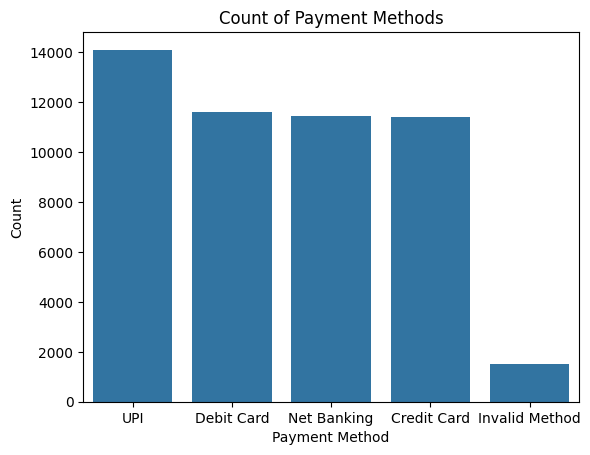

In [ ]:
sns.barplot(x=Count_of_Payment_Method.index, y=Count_of_Payment_Method.values)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Count of Payment Methods')
plt.show()

**In the last 24hrs, The highest transaction was done from UPI**

In [ ]:
Transaction_based_on_Type = df.groupby(['Payment_Method'])['Number_of_Transactions_Last_24H'].sum()
Transaction_based_on_Type.sort_values(ascending=False)

,Number_of_Transactions_Last_24H
Payment_Method,
UPI,105400
Debit Card,86910
Credit Card,86097
Net Banking,85808
Invalid Method,11459


In [ ]:
px.bar(Transaction_based_on_Type, x = Transaction_based_on_Type.index, y = 'Number_of_Transactions_Last_24H', title = 'Number of Transactions by Payment Method', labels = {'index': 'Payment Method', 'Number_of_Transactions_Last_24H': 'Number of Transactions'})

**Highest Fraud we have experienced on which Payment Type**

After Analysing the data we found highest payment took place from UPI and also highest fraud was also observed in the UPI Method.

In [ ]:
Number_of_Frauds_in_Payment_Method = df.groupby(['Payment_Method'])['Fraudulent'].sum()
Number_of_Frauds_in_Payment_Method

,Fraudulent
Payment_Method,
Credit Card,562
Debit Card,571
Invalid Method,73
Net Banking,562
UPI,699


In [ ]:
fig = px.bar(Number_of_Frauds_in_Payment_Method, x = Number_of_Frauds_in_Payment_Method.index, y = 'Fraudulent', title = 'Number of Frauds by Payment Method', labels = {'index': 'Payment Method', 'Fraudulent': 'Number of Frauds'}, color='Fraudulent', color_continuous_scale='Reds')
fig.show()

**Correlation Between Previous Fraud & Present Fraud Transaction**

In [ ]:
df.head(4)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.000000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.000000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.488575,Mobile,Boston,3,115,9,UPI,0
3,T4,2294,100.10,Bill Payment,15.000000,Desktop,Chicago,4,3,4,UPI,0


In [ ]:
df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent'],
      dtype='object')

**Correlation Between Previous Fraud & Present Fraud Transaction**

In [ ]:
Correlation = df[['Previous_Fraudulent_Transactions', 'Number_of_Transactions_Last_24H', 'Fraudulent']]
Correlation.head()

,Previous_Fraudulent_Transactions,Number_of_Transactions_Last_24H,Fraudulent
0,0,13,0
1,4,3,0
2,3,9,0
3,4,4,0
4,2,7,0


<Axes: >

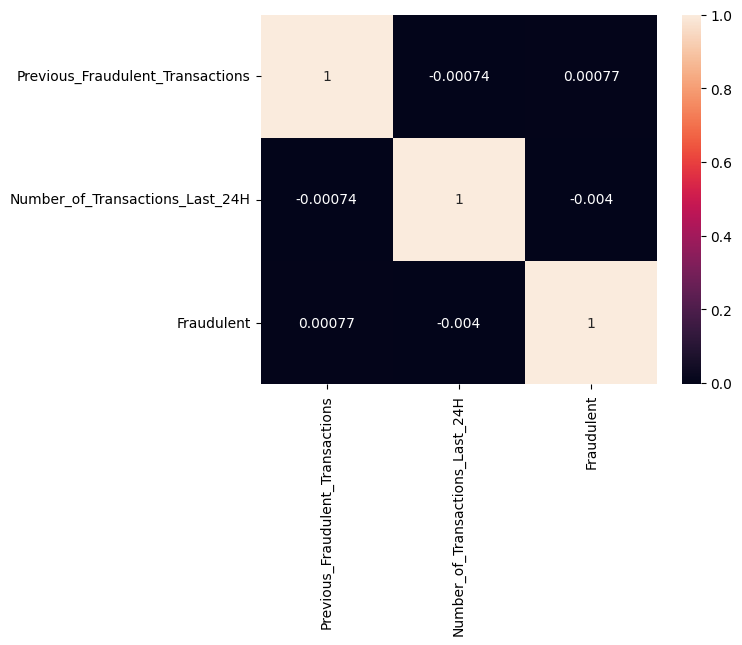

In [ ]:
sns.heatmap(Correlation.corr(), annot=True)

***Creating a Machine Learning Model by using Following Attributes- ***

In [ ]:
Sample_Data = df[['Previous_Fraudulent_Transactions', 'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent']]
Sample_Data.head()

,Previous_Fraudulent_Transactions,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,0,13,Debit Card,0
1,4,3,Credit Card,0
2,3,9,UPI,0
3,4,4,UPI,0
4,2,7,Credit Card,0


**Importing the necessary libraries for Creating a Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
Sample_Data.shape


(50119, 4)

In [ ]:
# Encode Categorical Feature (Payment Method)
encoder = LabelEncoder()

**Splitting the Data into a Trainig and a Testing Dataset**

In [ ]:
df['Payment_Method_Encoded'] = encoder.fit_transform(df['Payment_Method'])

In [ ]:
# Define Features (X) and Target (y)
X = df[['Previous_Fraudulent_Transactions', 'Number_of_Transactions_Last_24H', 'Payment_Method_Encoded']]
y = df['Fraudulent']


In [ ]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Using Random Forest Classifier Model for Prediction**

In [ ]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators= 100,random_state= 42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Features Importance**

In [ ]:
# Get Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns


# Create a DataFrame for Visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print Feature Importance
print(importance_df)

                            Feature  Importance
1   Number_of_Transactions_Last_24H    0.592746
2            Payment_Method_Encoded    0.214204
0  Previous_Fraudulent_Transactions    0.193050


**Plotted the Features Importance based on the Independent Features Taken**

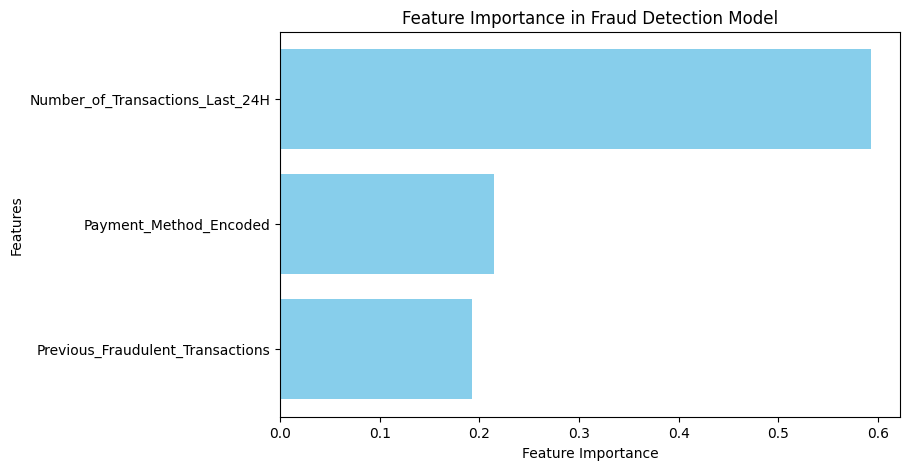

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Fraud Detection Model")
plt.gca().invert_yaxis()
plt.show()

**Making Predictions and Evaluationg the Model**

In [ ]:
# Predictions
y_pred = model.predict(X_test)



# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(report)

Model Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9533
           1       0.00      0.00      0.00       491

    accuracy                           0.95     10024
   macro avg       0.48      0.50      0.49     10024
weighted avg       0.90      0.95      0.93     10024



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Displayed Model's Accuracy Report in a Table**

In [ ]:
from tabulate import tabulate

Result = [["Random Forest", accuracy]]
print(tabulate(Result, headers=["Model", "Accuracy"]), end="\n\n")

Model            Accuracy
-------------  ----------
Random Forest    0.951018



### **Observations and Key Insights-**

1. **The Number of Transactions in the Last 24 Hours is a key indicator of fraudulent activity.**
2. **A high transaction frequency within a short period often signals suspicious behavior, making it one of the most critical features in fraud detection.**

**Random Forest** feature importance analysis confirms that this attribute significantly impacts model predictions, highlighting its value in identifying fraudulent transactions. 🚀




**📌 Why These Features Were Chosen for Fraud Detection?**

Because they provide **crucial insights** into transaction behavior and fraud patterns. Here’s why each feature is important:

🔹** Feature Selection Justification**
1️⃣ **Previous_Fraudulent_Transactions **🛑

**Why?** **Past fraudulent behavior** is a strong predictor of future fraud. Users with a history of fraud are more likely to engage in fraudulent transactions again.

**Impact?** Helps the model detect repeat offenders.


2️⃣ **Number_of_Transactions_Last_24H **⏳

Why? **Fraudulent accounts ** often make multiple transactions in a short period to avoid detection.

**Impact?** A sudden spike in transactions is a strong fraud signal


3️⃣ **Payment_Method **💳

**Why?** Certain payment methods (e.g. UPI) are more commonly used in fraud due to anonymity.

**Impact?** Helps the model identify high-risk payment types

4️⃣ **Fraudulent (Target Variable)** ✅

**Why?** This is the label (1 = Fraud, 0 = Not Fraud) that the model learns to predict.

**Impact?** Defines the classification problem.


These features were chosen because they capture **behavioral patterns** linked to fraud, including past fraud history, transaction frequency, and payment method risks. Each plays a unique role in improving the model's accuracy in detecting fraudulent transactions.




**📊 Insights from the Model**

**Transaction Amount & Frequency in the Last 24H** → Highly influential in fraud detection.

**Previous Fraudulent Transactions** → Users with past fraud are more likely to commit fraud again.

**Payment Method (UPI)** → On its own, it’s not the strongest fraud indicator, but combined with other factors, it enhances fraud detection.

**🔍 How to Improve UPI Fraud Detection?**

✅ **Anomaly Detection Algorithms** – Use Isolation Forest, One-Class SVM to detect outliers.

✅ **Real-Time Monitoring** – Implement fraud rules like blocking repeated high-value transactions.

✅ **Behavioral Analytics** – Track user’s device, location, and historical spending patterns.

✅ **Hybrid AI Approach** – Combine Machine Learning + Rule-Based Fraud Detection.